# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [2]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

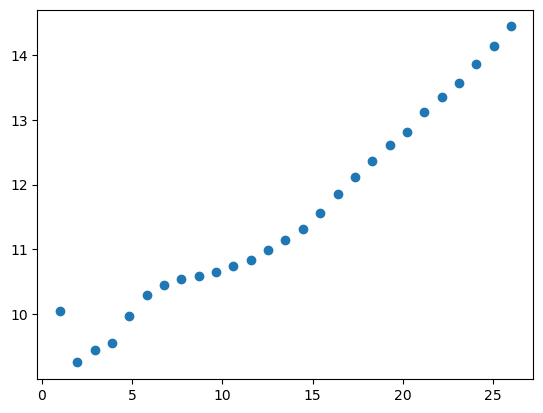

In [15]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline
m = len(data)
xn = np.linspace(1,26,m)
yn= data
plt.figure()
plt.scatter(xn, yn)


In [18]:
ones = np.ones([m,1])
x_vector = np.reshape(xn,[m,1])
X = np.hstack((ones, x_vector))
X
y_vector = np.reshape(yn,[m,1])



In [20]:
def f_de_costo(beta,x,y):
    # errror = predicción - valor 
    beta = np.reshape(beta,[2,1])
    y_pred = X @ beta 
    error = y_pred - y 
    return ((error).T @ (error))[0][0]


In [22]:
beta = [1,2]

In [23]:
opt.minimize(f_de_costo,beta,args=(X,y_vector))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.3704889518165437
        x: [ 8.922e+00  1.941e-01]
      nit: 4
      jac: [ 1.967e-06 -1.490e-06]
 hess_inv: [[ 7.869e-02 -4.457e-03]
            [-4.457e-03  3.302e-04]]
     nfev: 18
     njev: 6

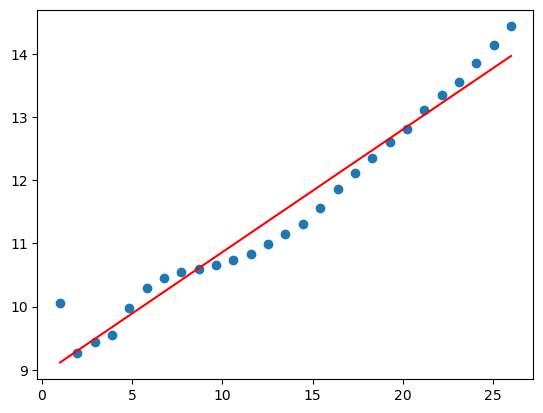

In [24]:
plt.figure()
plt.scatter(xn,yn)
plt.plot(xn,8.922e+00  + 1.941e-01*xn,"r")

In [25]:
x2_factor = np.reshape(xn**2,[m,1])
X = np.hstack((ones, x_vector,x2_factor))

def f_de_costo(beta,x,y):
    
    r,c= X.shape
    
    # errror = predicción - valor 
    beta = np.reshape(beta,[c,1])
    y_pred = X @ beta 
    error = y_pred - y 
    return ((error).T @ (error))[0][0]

beta = [4, 2, 1]

opt.minimize(f_de_costo,beta,args=(X,y_vector))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.8443845204584703
        x: [ 9.521e+00  6.593e-02  4.748e-03]
      nit: 8
      jac: [ 0.000e+00  1.565e-07  2.980e-08]
 hess_inv: [[ 1.963e-01 -2.962e-02  9.321e-04]
            [-2.962e-02  5.716e-03 -1.995e-04]
            [ 9.321e-04 -1.995e-04  7.388e-06]]
     nfev: 44
     njev: 11

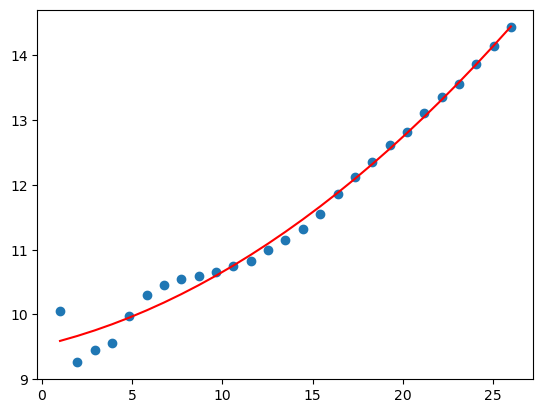

In [26]:
plt.figure()
plt.scatter(xn,yn)
plt.plot(xn,9.521e+00 + 6.593e-02*xn + 4.748e-03*xn**2,"r")

In [43]:
x3_factor = np.reshape(xn**3,[m,1])
X = np.hstack((ones, x_vector,x2_factor,x3_factor))

def f_de_costo(beta,x,y):
    
    r,c= X.shape
    
    # errror = predicción - valor 
    beta = np.reshape(beta,[c,1])
    y_pred = X @ beta 
    error = y_pred - y 
    return ((error).T @ (error))[0][0]

beta = [4, 2, 1, 0]

In [42]:
opt.minimize(f_de_costo,beta,args=(X,y_vector))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.8404423486819756
        x: [ 9.483e+00  8.101e-02  3.378e-03  3.383e-05]
      nit: 7
      jac: [-2.235e-08  2.235e-07  1.267e-07  1.341e-07]
 hess_inv: [[ 4.051e-01 -1.143e-01  8.623e-03 -1.899e-04]
            [-1.143e-01  4.005e-02 -3.318e-03  7.700e-05]
            [ 8.623e-03 -3.318e-03  2.906e-04 -6.992e-06]
            [-1.899e-04  7.700e-05 -6.992e-06  1.726e-07]]
     nfev: 55
     njev: 11

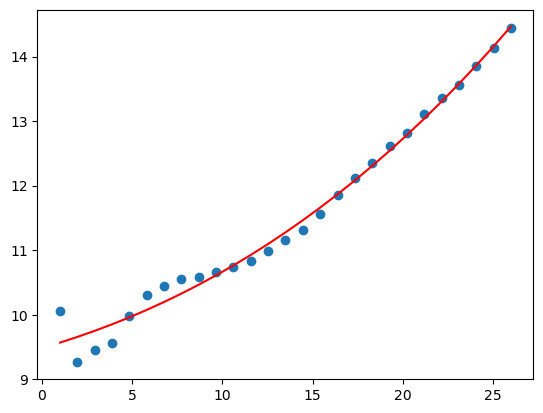

In [45]:
plt.figure()
plt.scatter(xn,yn)
plt.plot(xn,9.483e+00 + 8.101e-02*xn + 3.378e-03*xn**2 + 3.383e-05*xn**3,"r")

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [47]:
import pandas as pd 
data = pd.read_csv("population_data.csv")
data

FileNotFoundError: [Errno 2] No such file or directory: 'population_data.csv'